In [1]:
options(warn=-1)
suppressMessages({library("dplyr")
library("tidyr")
library("ggplot2")         
library("GenomicRanges")
library("eulerr")
library("gridExtra")})

In [2]:
CTCF_peaks <- read.csv("Auxiliary_data/ENCFF002CEL.bed.gz", header = F, sep = "\t")
CTCF_peaks <- filter(CTCF_peaks, V5 > 250)[,1:3]
CTCF_ranges <- GRanges(seqnames = CTCF_peaks$V1,ranges=IRanges(start=CTCF_peaks$V2, end=CTCF_peaks$V3))
colnames(CTCF_peaks)<-c("CTCF_chr","CTCF_start","CTCF_end")
DHSs <- read.csv("Auxiliary_data/ENCFF621ZJY.bed.gz", header = F, sep = "\t")
DHSs <- filter(DHSs, V7 > 200)[,1:3]
DHS_ranges <- GRanges(seqnames = DHSs$V1, ranges=IRanges(start=DHSs$V2, end=DHSs$V3))
DHSs <- DHSs[-(as.data.frame(findOverlaps(DHS_ranges,CTCF_ranges))[,1]),]
DHS_ranges <- GRanges(seqnames = DHSs$V1, ranges=IRanges(start=DHSs$V2, end=DHSs$V3))          
colnames(DHSs)<-c("DHS_chr","DHS_start","DHS_end")
vp <- read.csv("MChIPC_output/MChIPC_viewpoints.bed", header = F, sep = "\t")[,1:4]
vp_ranges <- GRanges(seqnames = vp$V1, ranges=IRanges(start=vp$V2, end=vp$V3))
colnames(vp)<-c("vp_chr","vp_start","vp_end","vp_name")

In [3]:
MChIPC_int <- read.csv("MChIPC_output/MChIPC_interactions.bedpe", header = F, sep = "\t")
MChIPC_OE_ranges <- GRanges(seqnames = MChIPC_int$V4, ranges=IRanges(start=MChIPC_int$V5, end=MChIPC_int$V6))
MChIPC_int <- MChIPC_int[-(as.data.frame(findOverlaps(MChIPC_OE_ranges,vp_ranges))[,1]),]
MChIPC_OE_ranges <- GRanges(seqnames = MChIPC_int$V4, ranges=IRanges(start=MChIPC_int$V5, end=MChIPC_int$V6))

MChIPC_int_050 <- read.csv("MChIPC_output/MChIPC_interactions.sub_0.5.bedpe", header = F, sep = "\t")
MChIPC_OE_050_ranges <- GRanges(seqnames = MChIPC_int_050$V4, ranges=IRanges(start=MChIPC_int_050$V5, end=MChIPC_int_050$V6))
MChIPC_int_050 <- MChIPC_int_050[-(as.data.frame(findOverlaps(MChIPC_OE_050_ranges,vp_ranges))[,1]),]
MChIPC_OE_050_ranges <- GRanges(seqnames = MChIPC_int_050$V4, ranges=IRanges(start=MChIPC_int_050$V5, end=MChIPC_int_050$V6))

MChIPC_int_025 <- read.csv("MChIPC_output/MChIPC_interactions.sub_0.25.bedpe", header = F, sep = "\t")
MChIPC_OE_025_ranges <- GRanges(seqnames = MChIPC_int_025$V4, ranges=IRanges(start=MChIPC_int_025$V5, end=MChIPC_int_025$V6))
MChIPC_int_025 <- MChIPC_int_025[-(as.data.frame(findOverlaps(MChIPC_OE_025_ranges,vp_ranges))[,1]),]
MChIPC_OE_025_ranges <- GRanges(seqnames = MChIPC_int_025$V4, ranges=IRanges(start=MChIPC_int_025$V5, end=MChIPC_int_025$V6))

MChIPC_int_010 <- read.csv("MChIPC_output/MChIPC_interactions.sub_0.1.bedpe", header = F, sep = "\t")
MChIPC_OE_010_ranges <- GRanges(seqnames = MChIPC_int_010$V4, ranges=IRanges(start=MChIPC_int_010$V5, end=MChIPC_int_010$V6))
MChIPC_int_010 <- MChIPC_int_010[-(as.data.frame(findOverlaps(MChIPC_OE_010_ranges,vp_ranges))[,1]),]
MChIPC_OE_010_ranges <- GRanges(seqnames = MChIPC_int_010$V4, ranges=IRanges(start=MChIPC_int_010$V5, end=MChIPC_int_010$V6))


In [4]:
MChIPC_CTCF <- distinct(cbind(MChIPC_int[as.data.frame(findOverlaps(MChIPC_OE_ranges,CTCF_ranges))[,1],],
                     CTCF_peaks[as.data.frame(findOverlaps(MChIPC_OE_ranges,CTCF_ranges))[,2],]))
MChIPC_DHS <- distinct(cbind(MChIPC_int[as.data.frame(findOverlaps(MChIPC_OE_ranges,DHS_ranges))[,1],],
                     DHSs[as.data.frame(findOverlaps(MChIPC_OE_ranges,DHS_ranges))[,2],]))
colnames(MChIPC_CTCF)[1:3] <- c("vp_chr","vp_start","vp_end")
colnames(MChIPC_DHS)[1:3] <- c("vp_chr","vp_start","vp_end")
MChIPC_CTCF <- distinct(MChIPC_CTCF[,c(1:3,7:9)])
MChIPC_CTCF$ds_100 <- TRUE
MChIPC_DHS <- distinct(MChIPC_DHS[,c(1:3,7:9)])
MChIPC_DHS$ds_100 <- TRUE

MChIPC_CTCF_050 <- distinct(cbind(MChIPC_int_050[as.data.frame(findOverlaps(MChIPC_OE_050_ranges,CTCF_ranges))[,1],],
                     CTCF_peaks[as.data.frame(findOverlaps(MChIPC_OE_050_ranges,CTCF_ranges))[,2],]))
MChIPC_DHS_050 <- distinct(cbind(MChIPC_int_050[as.data.frame(findOverlaps(MChIPC_OE_050_ranges,DHS_ranges))[,1],],
                     DHSs[as.data.frame(findOverlaps(MChIPC_OE_050_ranges,DHS_ranges))[,2],]))
colnames(MChIPC_CTCF_050)[1:3] <- c("vp_chr","vp_start","vp_end")
colnames(MChIPC_DHS_050)[1:3] <- c("vp_chr","vp_start","vp_end")
MChIPC_CTCF_050 <- distinct(MChIPC_CTCF_050[,c(1:3,7:9)])
MChIPC_CTCF_050$ds_50 <- TRUE
MChIPC_DHS_050 <- distinct(MChIPC_DHS_050[,c(1:3,7:9)])
MChIPC_DHS_050$ds_50 <- TRUE

MChIPC_CTCF_025 <- distinct(cbind(MChIPC_int_025[as.data.frame(findOverlaps(MChIPC_OE_025_ranges,CTCF_ranges))[,1],],
                     CTCF_peaks[as.data.frame(findOverlaps(MChIPC_OE_025_ranges,CTCF_ranges))[,2],]))
MChIPC_DHS_025 <- distinct(cbind(MChIPC_int_025[as.data.frame(findOverlaps(MChIPC_OE_025_ranges,DHS_ranges))[,1],],
                     DHSs[as.data.frame(findOverlaps(MChIPC_OE_025_ranges,DHS_ranges))[,2],]))
colnames(MChIPC_CTCF_025)[1:3] <- c("vp_chr","vp_start","vp_end")
colnames(MChIPC_DHS_025)[1:3] <- c("vp_chr","vp_start","vp_end")
MChIPC_CTCF_025 <- distinct(MChIPC_CTCF_025[,c(1:3,7:9)])
MChIPC_CTCF_025$ds_25 <- TRUE
MChIPC_DHS_025 <- distinct(MChIPC_DHS_025[,c(1:3,7:9)])
MChIPC_DHS_025$ds_25 <- TRUE

MChIPC_CTCF_010 <- distinct(cbind(MChIPC_int_010[as.data.frame(findOverlaps(MChIPC_OE_010_ranges,CTCF_ranges))[,1],],
                     CTCF_peaks[as.data.frame(findOverlaps(MChIPC_OE_010_ranges,CTCF_ranges))[,2],]))
MChIPC_DHS_010 <- distinct(cbind(MChIPC_int_010[as.data.frame(findOverlaps(MChIPC_OE_010_ranges,DHS_ranges))[,1],],
                     DHSs[as.data.frame(findOverlaps(MChIPC_OE_010_ranges,DHS_ranges))[,2],]))
colnames(MChIPC_CTCF_010)[1:3] <- c("vp_chr","vp_start","vp_end")
colnames(MChIPC_DHS_010)[1:3] <- c("vp_chr","vp_start","vp_end")
MChIPC_CTCF_010 <- distinct(MChIPC_CTCF_010[,c(1:3,7:9)])
MChIPC_CTCF_010$ds_10 <- TRUE
MChIPC_DHS_010 <- distinct(MChIPC_DHS_010[,c(1:3,7:9)])
MChIPC_DHS_010$ds_10 <- TRUE

In [5]:
MChIPC_CTCF <- full_join(full_join(full_join(MChIPC_CTCF, MChIPC_CTCF_050), MChIPC_CTCF_025), MChIPC_CTCF_010)
MChIPC_CTCF[is.na(MChIPC_CTCF)] <- FALSE
MChIPC_DHS <- full_join(full_join(full_join(MChIPC_DHS, MChIPC_DHS_050), MChIPC_DHS_025), MChIPC_DHS_010)
MChIPC_DHS[is.na(MChIPC_DHS)] <- FALSE

Joining, by = c("vp_chr", "vp_start", "vp_end", "CTCF_chr", "CTCF_start",
"CTCF_end")
Joining, by = c("vp_chr", "vp_start", "vp_end", "CTCF_chr", "CTCF_start",
"CTCF_end")
Joining, by = c("vp_chr", "vp_start", "vp_end", "CTCF_chr", "CTCF_start",
"CTCF_end")
Joining, by = c("vp_chr", "vp_start", "vp_end", "DHS_chr", "DHS_start",
"DHS_end")
Joining, by = c("vp_chr", "vp_start", "vp_end", "DHS_chr", "DHS_start",
"DHS_end")
Joining, by = c("vp_chr", "vp_start", "vp_end", "DHS_chr", "DHS_start",
"DHS_end")


png 
  2

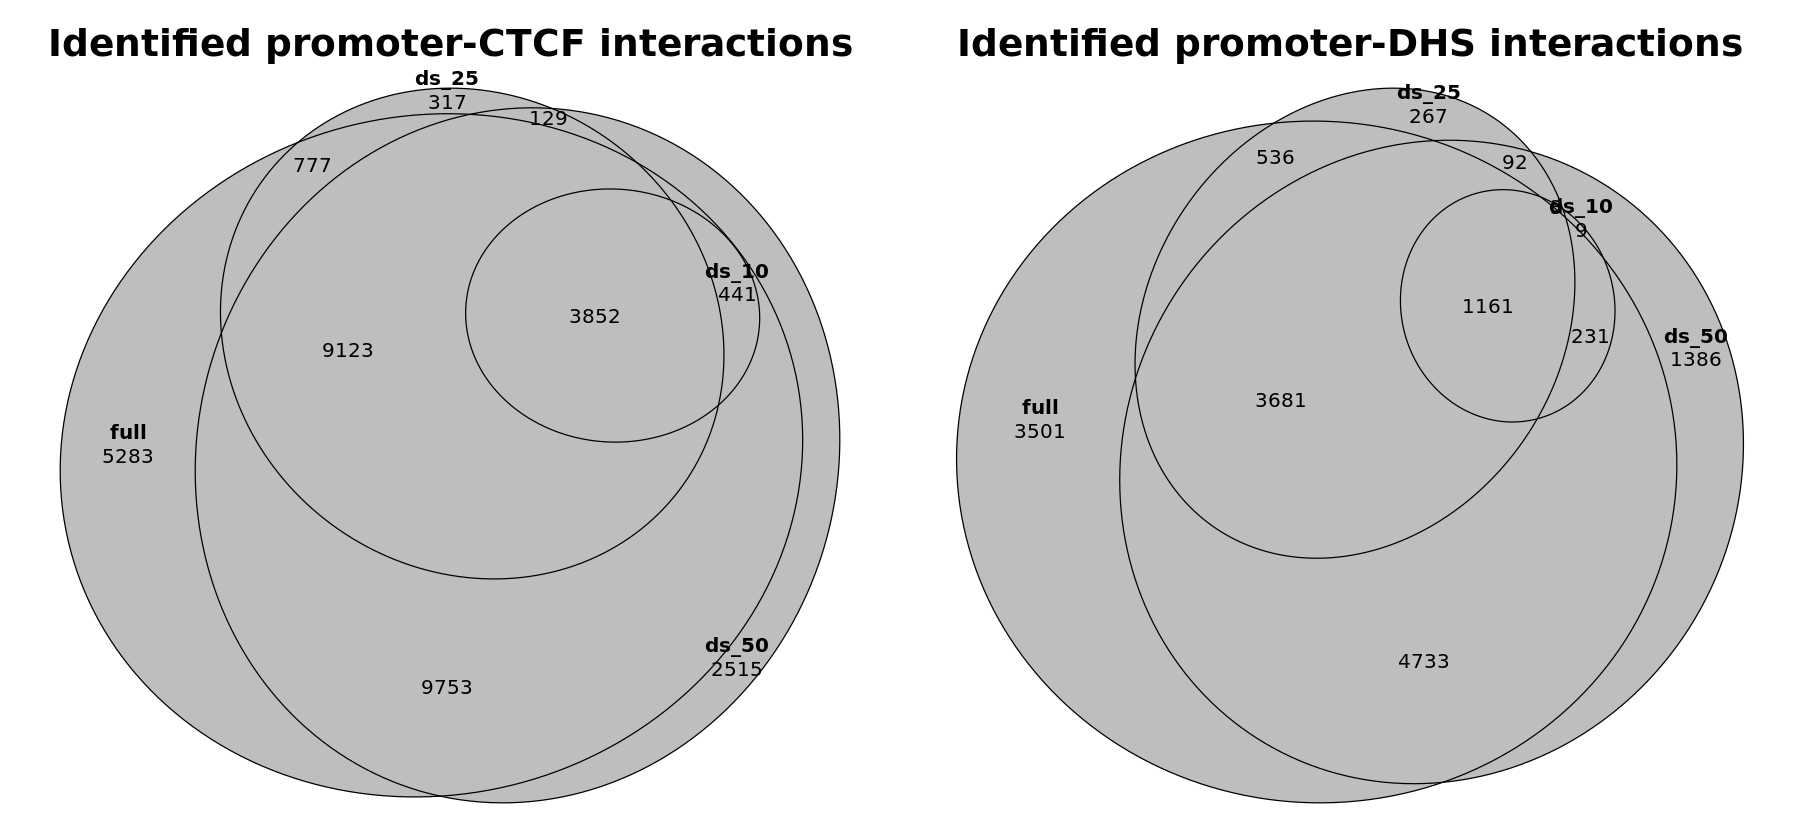

In [6]:
CTCF <- plot(euler(MChIPC_CTCF[,7:10], shape="ellipse"), quantities = TRUE, 
     fills=list(fill=c("grey","grey","grey","grey")),
     main=list(label="Identified promoter-CTCF interactions", fontsize=15, font=2), 
     labels=list(labels=c("full", "ds_50", "ds_25", "ds_10")), adjust_labels=TRUE)
DHS <- plot(euler(MChIPC_DHS[,7:10], shape="ellipse"), quantities = TRUE, 
     fills=list(fill=c("grey","grey","grey","grey")),
     main=list(label="Identified promoter-DHS interactions", fontsize=15, font=2), 
     labels=list(labels=c("full", "ds_50", "ds_25", "ds_10")), adjust_labels=TRUE)
options(repr.plot.width=15, repr.plot.height=7)
grid.arrange(CTCF,DHS,widths=c(0.5,0.5),heights=unit(6.5,"in"), ncol=2)

pdf("Figures/Fig.S6/S6c_interactions_downsampled.pdf", width=15, height=7)
grid.arrange(CTCF,DHS,widths=c(0.5,0.5),heights=unit(6.5,"in"), ncol=2)
dev.off()

In [48]:
nrow(filter(MChIPC_CTCF, ds_100 & ds_50))
nrow(filter(MChIPC_CTCF, ds_100))
nrow(filter(MChIPC_CTCF, ds_100 & ds_50))/nrow(filter(MChIPC_CTCF, ds_100))

nrow(filter(MChIPC_DHS, ds_100 & ds_50))
nrow(filter(MChIPC_DHS, ds_100))
nrow(filter(MChIPC_DHS, ds_100 & ds_50))/nrow(filter(MChIPC_DHS, ds_100))

[1] 23169

[1] 29321

[1] 0.7901845

[1] 9806

[1] 13913

[1] 0.7048085

In [9]:
install.packages("UpSetR")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [10]:
library("UpSetR")

In [30]:
pdf("Figures/Fig.S6/S6c_upset_CTCF.pdf", width=15, height=7)
upset(as.data.frame(1*as.matrix(MChIPC_CTCF[,7:10])), nsets=4, order.by="freq", 
      sets.x.label="Number of identified\npromoter-CTCF interactions", text.scale=2)
dev.off()
pdf("Figures/Fig.S6/S6c_upset_DHS.pdf", width=15, height=7)
upset(as.data.frame(1*as.matrix(MChIPC_DHS[,7:10])), nsets=4, order.by="freq", 
      sets.x.label="Number of identified\npromoter-DHS interactions", text.scale=2)
dev.off()

png 
  2

png 
  2

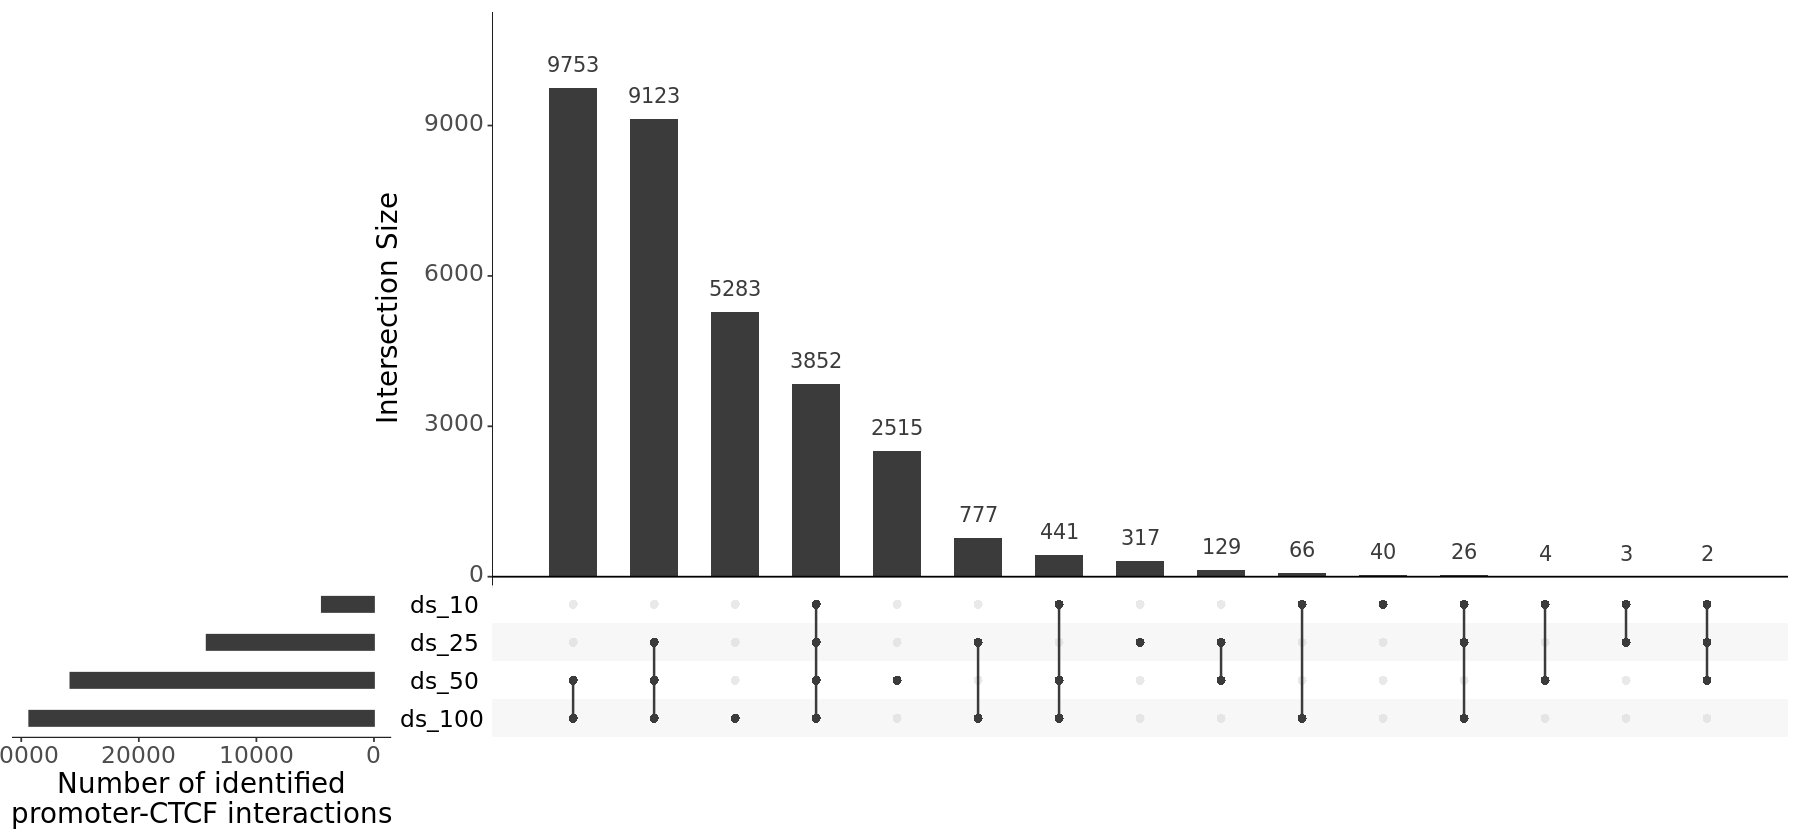

In [29]:
upset(as.data.frame(1*as.matrix(MChIPC_CTCF[,7:10])), nsets=4, order.by="freq", 
      sets.x.label="Number of identified\npromoter-CTCF interactions", text.scale=2)


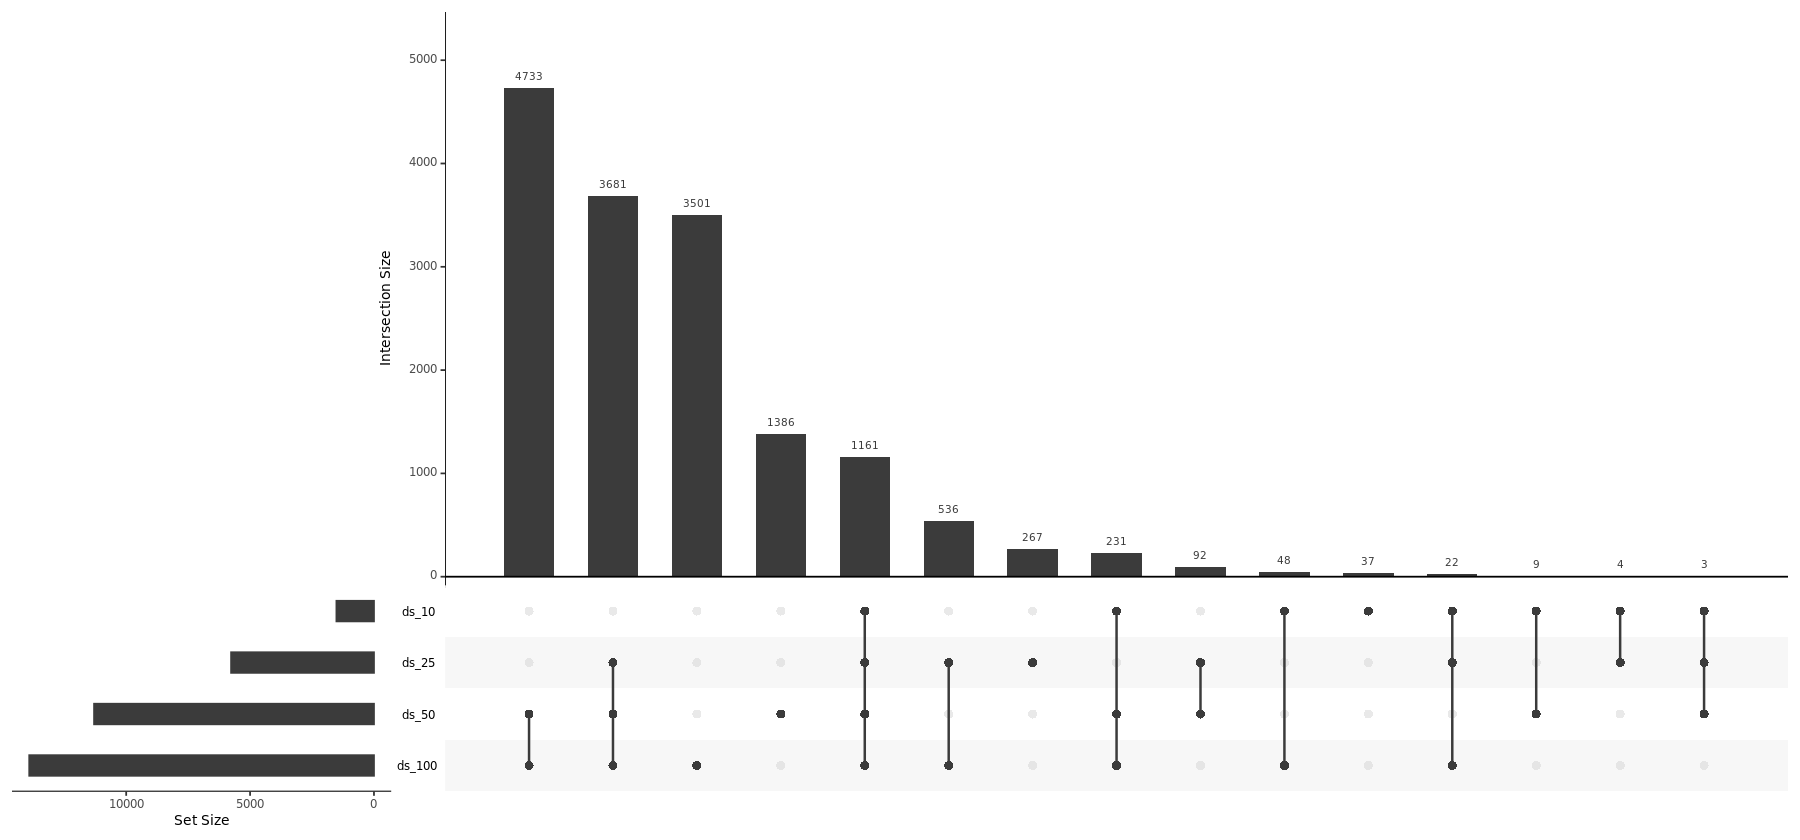

In [26]:
upset(as.data.frame(1*as.matrix(MChIPC_DHS[,7:10])), nsets=4, order.by="freq")

In [18]:
?upset